In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_confusion_matrix, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA, NMF
from pandas import qcut, cut
from sklearn.preprocessing import KBinsDiscretizer
from datetime import datetime as dt
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 500)

## The goal of your analysis is to identify the most important features of houses that affect the sale prices.

Data cleaning, Data manipulation, Data visualization, and various statistical analysis methods.

Apply the iterative data analysis process -- setting expectations, collecting information, and reacting to data / revising expectations.


## Exploring my Dataset


In [2]:
housing_data = pd.read_csv('train.csv')
housing_data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
housing_data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [4]:
#Dropping columns with almost no data
useless_data=['PoolQC','MiscFeature','Alley','Fence']
housing_data.drop(columns=useless_data, axis = 1, inplace=True)

In [5]:
len(housing_data)

1460

In [6]:
for col in housing_data.columns:
    if (housing_data[col].value_counts().iloc[0] > 1460 *.7 ) == True:
        housing_data.drop(col, axis=1, inplace=True)


In [7]:
housing_data.head()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,Reg,CollgCr,2Story,7,5,2003,...,Attchd,2003.0,RFn,2,548,0,61,2,2008,208500
1,2,20,80.0,9600,Reg,Veenker,1Story,6,8,1976,...,Attchd,1976.0,RFn,2,460,298,0,5,2007,181500
2,3,60,68.0,11250,IR1,CollgCr,2Story,7,5,2001,...,Attchd,2001.0,RFn,2,608,0,42,9,2008,223500
3,4,70,60.0,9550,IR1,Crawfor,2Story,7,5,1915,...,Detchd,1998.0,Unf,3,642,0,35,2,2006,140000
4,5,60,84.0,14260,IR1,NoRidge,2Story,8,5,2000,...,Attchd,2000.0,RFn,3,836,192,84,12,2008,250000


In [8]:
# In this way I dropped columns that are useless because more than 70% of their values are the same
# This might indicate that they are not very usefull for correlationship studies and decision making

In [9]:
housing_data.isnull().sum()

Id                0
MSSubClass        0
LotFrontage     259
LotArea           0
LotShape          0
Neighborhood      0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
Foundation        0
BsmtQual         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
HeatingQC         0
1stFlrSF          0
2ndFlrSF          0
GrLivArea         0
BsmtFullBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Fireplaces        0
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageCars        0
GarageArea        0
WoodDeckSF        0
OpenPorchSF       0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

## Cleaning My Dataset & Filling NaN Values


In [10]:
housing_data['LotFrontage'].dtypes

dtype('float64')

In [11]:
# Im going to fill in lot frontage with the median value, using numpy since this column is a float type
housing_data['LotFrontage'].replace([np.nan], housing_data['LotFrontage'].median(), inplace=True)

In [12]:
housing_data = housing_data.astype({'LotFrontage':'int'}) 

In [13]:
# now its time to fill in missing values on specific columns which do not contain garages or basements to remove nans
housing_data[['FireplaceQu','GarageType','GarageYrBlt','GarageFinish','BsmtQual','BsmtExposure','BsmtFinType1','MasVnrType','MasVnrArea']].dtypes

FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
BsmtQual         object
BsmtExposure     object
BsmtFinType1     object
MasVnrType       object
MasVnrArea      float64
dtype: object

In [14]:
housing_data['GarageYrBlt'] = housing_data['GarageYrBlt'].fillna('NoGarage')

In [15]:
housing_data['GarageType'] = housing_data['GarageType'].fillna('NoGarage')

In [16]:
housing_data['GarageFinish'] = housing_data['GarageFinish'].fillna('NoGarage')

In [17]:
housing_data.isna()[['GarageYrBlt','GarageType','GarageFinish']].sum()

GarageYrBlt     0
GarageType      0
GarageFinish    0
dtype: int64

In [18]:
# lets do the same for basements
housing_data.isna()[['BsmtQual','BsmtExposure','BsmtFinType1']].sum()

BsmtQual        37
BsmtExposure    38
BsmtFinType1    37
dtype: int64

In [19]:
housing_data['BsmtQual'] = housing_data['BsmtQual'].fillna('NoBasement')
housing_data['BsmtExposure'] = housing_data['BsmtExposure'].fillna('NoBasement')
housing_data['BsmtFinType1'] = housing_data['BsmtFinType1'].fillna('NoBasement')

In [20]:
housing_data.isna()[['BsmtQual','BsmtExposure','BsmtFinType1']].sum()

BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
dtype: int64

In [21]:
housing_data['MasVnrType'] = housing_data['MasVnrType'].fillna('None')
housing_data['MasVnrArea'] = housing_data['MasVnrArea'].fillna('None')


In [22]:
housing_data.isna()[['MasVnrArea','MasVnrType']].sum()

MasVnrArea    0
MasVnrType    0
dtype: int64

In [23]:
housing_data[housing_data['FireplaceQu'].isna()][['FireplaceQu','Fireplaces']]

,FireplaceQu,Fireplaces
0,NaN,0
5,NaN,0
10,NaN,0
12,NaN,0
15,NaN,0
...,...,...
1452,NaN,0
1453,NaN,0
1454,NaN,0
1458,NaN,0


In [24]:
housing_data['FireplaceQu'] = housing_data['FireplaceQu'].fillna('NoFireplace')


In [25]:
housing_data.isnull().sum()

Id              0
MSSubClass      0
LotFrontage     0
LotArea         0
LotShape        0
Neighborhood    0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
HeatingQC       0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
BsmtFullBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenQual     0
TotRmsAbvGrd    0
Fireplaces      0
FireplaceQu     0
GarageType      0
GarageYrBlt     0
GarageFinish    0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64

## Evaluating my Numerical Data Based on Correlation

In [26]:
study_numerical= housing_data.corr()['SalePrice'].reset_index()
study_numerical.sort_values('SalePrice', ascending=False)[1:20].reset_index()

,level_0,index,SalePrice
0,4,OverallQual,0.790982
1,13,GrLivArea,0.708624
2,20,GarageCars,0.640409
3,21,GarageArea,0.623431
4,10,TotalBsmtSF,0.613581
5,11,1stFlrSF,0.605852
6,15,FullBath,0.560664
7,18,TotRmsAbvGrd,0.533723
8,6,YearBuilt,0.522897
9,7,YearRemodAdd,0.507101


In [27]:
num=housing_data[housing_data.select_dtypes(include='number').columns]
num

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,1,60,65,8450,7,5,2003,2003,706,150,...,3,8,0,2,548,0,61,2,2008,208500
1,2,20,80,9600,6,8,1976,1976,978,284,...,3,6,1,2,460,298,0,5,2007,181500
2,3,60,68,11250,7,5,2001,2002,486,434,...,3,6,1,2,608,0,42,9,2008,223500
3,4,70,60,9550,7,5,1915,1970,216,540,...,3,7,1,3,642,0,35,2,2006,140000
4,5,60,84,14260,8,5,2000,2000,655,490,...,4,9,1,3,836,192,84,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62,7917,6,5,1999,2000,0,953,...,3,7,1,2,460,0,40,8,2007,175000
1456,1457,20,85,13175,6,6,1978,1988,790,589,...,3,7,2,2,500,349,0,2,2010,210000
1457,1458,70,66,9042,7,9,1941,2006,275,877,...,4,9,2,1,252,0,60,5,2010,266500
1458,1459,20,68,9717,5,6,1950,1996,49,0,...,2,5,0,1,240,366,0,4,2010,142125


## Evaluating my Categorical Data Based on Correlation

In [28]:
# First we will want to convert our categorical data into numerical data

In [29]:
categoricals = housing_data[housing_data.select_dtypes(include='object').columns]
categoricals

,LotShape,Neighborhood,HouseStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageType,GarageYrBlt,GarageFinish
0,Reg,CollgCr,2Story,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,Ex,Gd,NoFireplace,Attchd,2003.0,RFn
1,Reg,Veenker,1Story,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,Ex,TA,TA,Attchd,1976.0,RFn
2,IR1,CollgCr,2Story,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,TA,Attchd,2001.0,RFn
3,IR1,Crawfor,2Story,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,Gd,Gd,Gd,Detchd,1998.0,Unf
4,IR1,NoRidge,2Story,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,Ex,Gd,TA,Attchd,2000.0,RFn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Reg,Gilbert,2Story,VinylSd,VinylSd,None,0.0,TA,PConc,Gd,No,Unf,Ex,TA,TA,Attchd,1999.0,RFn
1456,Reg,NWAmes,1Story,Plywood,Plywood,Stone,119.0,TA,CBlock,Gd,No,ALQ,TA,TA,TA,Attchd,1978.0,Unf
1457,Reg,Crawfor,2Story,CemntBd,CmentBd,None,0.0,Ex,Stone,TA,No,GLQ,Ex,Gd,Gd,Attchd,1941.0,RFn
1458,Reg,NAmes,1Story,MetalSd,MetalSd,None,0.0,TA,CBlock,TA,Mn,GLQ,Gd,Gd,NoFireplace,Attchd,1950.0,Unf


In [30]:
cat=pd.get_dummies(categoricals)
cat['SalePrice']=housing_data['SalePrice']
cat

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,GarageYrBlt_2007.0,GarageYrBlt_2008.0,GarageYrBlt_2009.0,GarageYrBlt_2010.0,GarageYrBlt_NoGarage,GarageFinish_Fin,GarageFinish_NoGarage,GarageFinish_RFn,GarageFinish_Unf,SalePrice
0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,208500
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,181500
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,223500
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,140000
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,175000
1456,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,210000
1457,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,266500
1458,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,142125


In [31]:
study_categorical= cat.corr()['SalePrice'].reset_index()
study_categorical.sort_values('SalePrice', ascending=False)[1:20].reset_index()

,level_0,index,SalePrice
0,410,BsmtQual_Ex,0.553105
1,432,KitchenQual_Ex,0.504094
2,406,Foundation_PConc,0.497734
3,402,ExterQual_Gd,0.452466
4,400,ExterQual_Ex,0.451164
5,422,BsmtFinType1_GLQ,0.434597
6,427,HeatingQC_Ex,0.434543
7,547,GarageFinish_Fin,0.419678
8,20,Neighborhood_NridgHt,0.402149
9,438,FireplaceQu_Gd,0.339329


## Merge Categoricals and Numericals - Define Top Variables

In [32]:
new_housing= pd.concat([cat.loc[:,cat.columns != 'SalePrice'], num] , axis=1 )

In [33]:
new_housing

,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,0,0,0,1,...,3,8,0,2,548,0,61,2,2008,208500
1,0,0,0,1,0,0,0,0,0,0,...,3,6,1,2,460,298,0,5,2007,181500
2,1,0,0,0,0,0,0,0,0,1,...,3,6,1,2,608,0,42,9,2008,223500
3,1,0,0,0,0,0,0,0,0,0,...,3,7,1,3,642,0,35,2,2006,140000
4,1,0,0,0,0,0,0,0,0,0,...,4,9,1,3,836,192,84,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,0,0,0,...,3,7,1,2,460,0,40,8,2007,175000
1456,0,0,0,1,0,0,0,0,0,0,...,3,7,2,2,500,349,0,2,2010,210000
1457,0,0,0,1,0,0,0,0,0,0,...,4,9,2,1,252,0,60,5,2010,266500
1458,0,0,0,1,0,0,0,0,0,0,...,2,5,0,1,240,366,0,4,2010,142125


In [34]:
final_correlation = new_housing.corr()['SalePrice'].reset_index()
final_correlation = final_correlation.sort_values('SalePrice', ascending=False)[1:21].reset_index()

## Outlier Treatment

In [35]:
final_correlation['index'].values
to_be_transformed=new_housing[final_correlation['index'].values]


In [36]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()

In [37]:
pt.fit(to_be_transformed)

PowerTransformer()

In [38]:
transformed=pt.transform(to_be_transformed)

In [39]:
pt.get_feature_names_out()

array(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex',
       'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex',
       'Foundation_PConc', 'Fireplaces', 'ExterQual_Gd', 'ExterQual_Ex',
       'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'GarageFinish_Fin',
       'Neighborhood_NridgHt'], dtype=object)

In [40]:
final_data=pd.DataFrame(transformed, columns=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex',
       'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'KitchenQual_Ex',
       'Foundation_PConc', 'Fireplaces', 'ExterQual_Gd', 'ExterQual_Ex',
       'BsmtFinType1_GLQ', 'HeatingQC_Ex', 'GarageFinish_Fin',
       'Neighborhood_NridgHt'] )

In [41]:
final_data

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,BsmtQual_Ex,TotRmsAbvGrd,YearBuilt,YearRemodAdd,KitchenQual_Ex,Foundation_PConc,Fireplaces,ExterQual_Gd,ExterQual_Ex,BsmtFinType1_GLQ,HeatingQC_Ex,GarageFinish_Fin,Neighborhood_NridgHt
0,0.667499,0.528531,0.273835,0.383899,-0.404029,-0.799624,0.797246,-0.300609,0.946380,1.151867,0.908055,-0.271163,1.120968,-1.027341,1.411313,-0.192177,1.578868,0.985043,-0.563640,-0.235958
1,-0.042192,-0.382755,0.273835,-0.004602,0.508177,0.429151,0.797246,-0.300609,-0.234627,0.006695,-0.621670,-0.271163,-0.892086,0.784005,-0.708560,-0.192177,-0.633365,0.985043,-0.563640,-0.235958
2,0.667499,0.659112,0.273835,0.641990,-0.253787,-0.568533,0.797246,-0.300609,-0.234627,1.055357,0.835594,-0.271163,1.120968,0.784005,1.411313,-0.192177,1.578868,0.985043,-0.563640,-0.235958
3,0.667499,0.540797,1.759713,0.786092,-0.644806,-0.429428,-1.025173,-0.300609,0.389921,-1.629540,-0.863478,-0.271163,-0.892086,0.784005,-0.708560,-0.192177,-0.633365,-1.015184,-0.563640,-0.235958
4,1.350924,1.282894,1.759713,1.583257,0.254387,0.124698,0.797246,-0.300609,1.448615,1.007861,0.694898,-0.271163,1.120968,0.784005,1.411313,-0.192177,1.578868,0.985043,-0.563640,-0.235958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.042192,0.415837,0.273835,-0.004602,-0.177387,-0.456061,0.797246,-0.300609,0.389921,0.960863,0.694898,-0.271163,1.120968,0.784005,-0.708560,-0.192177,-0.633365,0.985043,-0.563640,-0.235958
1456,-0.042192,1.106859,0.273835,0.173581,1.092127,1.946238,0.797246,-0.300609,0.389921,0.080711,-0.041619,-0.271163,-0.892086,1.638448,-0.708560,-0.192177,-0.633365,-1.015184,-0.563640,-0.235958
1457,0.667499,1.471180,-1.047926,-0.987927,0.269755,0.240338,0.797246,-0.300609,1.448615,-1.061347,1.134227,-0.271163,-0.892086,1.638448,-0.708560,5.203549,1.578868,0.985043,-0.563640,-0.235958
1458,-0.783171,-0.854788,-1.047926,-1.048544,0.106028,-0.065163,-1.025173,-0.300609,-0.947362,-0.823991,0.429676,-0.271163,-0.892086,-1.027341,-0.708560,-0.192177,1.578868,-1.015184,-0.563640,-0.235958


In [42]:
final_data_= pd.concat([new_housing.loc[:,new_housing.columns == 'SalePrice'], final_data] , axis=1 )

In [43]:
final_data_

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,BsmtQual_Ex,TotRmsAbvGrd,...,YearRemodAdd,KitchenQual_Ex,Foundation_PConc,Fireplaces,ExterQual_Gd,ExterQual_Ex,BsmtFinType1_GLQ,HeatingQC_Ex,GarageFinish_Fin,Neighborhood_NridgHt
0,208500,0.667499,0.528531,0.273835,0.383899,-0.404029,-0.799624,0.797246,-0.300609,0.946380,...,0.908055,-0.271163,1.120968,-1.027341,1.411313,-0.192177,1.578868,0.985043,-0.563640,-0.235958
1,181500,-0.042192,-0.382755,0.273835,-0.004602,0.508177,0.429151,0.797246,-0.300609,-0.234627,...,-0.621670,-0.271163,-0.892086,0.784005,-0.708560,-0.192177,-0.633365,0.985043,-0.563640,-0.235958
2,223500,0.667499,0.659112,0.273835,0.641990,-0.253787,-0.568533,0.797246,-0.300609,-0.234627,...,0.835594,-0.271163,1.120968,0.784005,1.411313,-0.192177,1.578868,0.985043,-0.563640,-0.235958
3,140000,0.667499,0.540797,1.759713,0.786092,-0.644806,-0.429428,-1.025173,-0.300609,0.389921,...,-0.863478,-0.271163,-0.892086,0.784005,-0.708560,-0.192177,-0.633365,-1.015184,-0.563640,-0.235958
4,250000,1.350924,1.282894,1.759713,1.583257,0.254387,0.124698,0.797246,-0.300609,1.448615,...,0.694898,-0.271163,1.120968,0.784005,1.411313,-0.192177,1.578868,0.985043,-0.563640,-0.235958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,175000,-0.042192,0.415837,0.273835,-0.004602,-0.177387,-0.456061,0.797246,-0.300609,0.389921,...,0.694898,-0.271163,1.120968,0.784005,-0.708560,-0.192177,-0.633365,0.985043,-0.563640,-0.235958
1456,210000,-0.042192,1.106859,0.273835,0.173581,1.092127,1.946238,0.797246,-0.300609,0.389921,...,-0.041619,-0.271163,-0.892086,1.638448,-0.708560,-0.192177,-0.633365,-1.015184,-0.563640,-0.235958
1457,266500,0.667499,1.471180,-1.047926,-0.987927,0.269755,0.240338,0.797246,-0.300609,1.448615,...,1.134227,-0.271163,-0.892086,1.638448,-0.708560,5.203549,1.578868,0.985043,-0.563640,-0.235958
1458,142125,-0.783171,-0.854788,-1.047926,-1.048544,0.106028,-0.065163,-1.025173,-0.300609,-0.947362,...,0.429676,-0.271163,-0.892086,-1.027341,-0.708560,-0.192177,1.578868,-1.015184,-0.563640,-0.235958


## Time To Build Our Model

In [44]:
X= final_data_.loc[:,  final_data_.columns !='SalePrice']
y= final_data_['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)

In [45]:
lin = LinearRegression()
lin.fit(X_train,y_train)

y_pred= lin.predict(X_test)

In [46]:
test = pd.DataFrame({"y_real": y_test, "y_pred": y_pred})
test = pd.concat([test, X_test], axis=1)

test["SalePrice"] = test["y_real"]
test["pred_SalePrice"] = test["y_pred"]
test

,y_real,y_pred,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,BsmtQual_Ex,...,Foundation_PConc,Fireplaces,ExterQual_Gd,ExterQual_Ex,BsmtFinType1_GLQ,HeatingQC_Ex,GarageFinish_Fin,Neighborhood_NridgHt,SalePrice,pred_SalePrice
1172,171900,170813.556968,0.667499,-0.411386,0.273835,0.714225,-0.973262,-1.823096,0.797246,-0.300609,...,1.120968,-1.027341,1.411313,-0.192177,-0.633365,0.985043,1.774184,-0.235958,171900,170813.556968
903,240000,237159.695366,0.667499,0.457468,1.759713,0.987113,1.349685,1.292765,0.797246,-0.300609,...,1.120968,0.784005,1.411313,-0.192177,-0.633365,0.985043,-0.563640,-0.235958,240000,237159.695366
1396,160000,167822.438187,-0.783171,0.487874,0.273835,0.487744,-0.666870,1.323632,-1.025173,-0.300609,...,-0.892086,1.638448,-0.708560,-0.192177,-0.633365,-1.015184,-0.563640,-0.235958,160000,167822.438187
745,299800,324821.204367,1.350924,1.918516,0.273835,1.563186,0.247793,0.205859,2.480321,-0.300609,...,-0.892086,1.638448,-0.708560,5.203549,1.578868,0.985043,1.774184,-0.235958,299800,324821.204367
699,196000,209680.519172,0.667499,-0.090999,0.273835,0.305453,0.781000,0.731372,0.797246,-0.300609,...,1.120968,-1.027341,1.411313,-0.192177,1.578868,0.985043,-0.563640,-0.235958,196000,209680.519172
894,118858,121432.066980,-0.783171,0.204481,0.273835,-0.277503,-3.131482,1.034904,0.797246,-0.300609,...,-0.892086,-1.027341,-0.708560,-0.192177,-0.633365,-1.015184,-0.563640,-0.235958,118858,121432.066980
1235,138887,128799.431133,-0.783171,0.655747,-1.047926,-1.361010,-0.666870,-0.667431,-1.025173,-0.300609,...,-0.892086,-1.027341,-0.708560,-0.192177,-0.633365,-1.015184,-0.563640,-0.235958,138887,128799.431133
1047,145000,146510.006610,-0.783171,-1.109663,0.273835,0.912049,-0.092540,-0.334848,-1.025173,-0.300609,...,1.120968,-1.027341,-0.708560,-0.192177,1.578868,0.985043,-0.563640,-0.235958,145000,146510.006610
1363,156932,171275.901590,-0.042192,-0.046065,0.273835,-0.131064,-0.996452,-1.870906,0.797246,-0.300609,...,1.120968,0.784005,-0.708560,-0.192177,-0.633365,0.985043,1.774184,-0.235958,156932,171275.901590
1342,228500,246468.083391,1.350924,1.242957,0.273835,0.807160,0.555200,0.482988,0.797246,-0.300609,...,1.120968,0.784005,1.411313,-0.192177,-0.633365,0.985043,-0.563640,-0.235958,228500,246468.083391


In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [48]:
np.sqrt(mean_squared_error(test["SalePrice"], test["pred_SalePrice"]))


39905.25308480582

In [49]:
## checking some of my variables in scatter plots

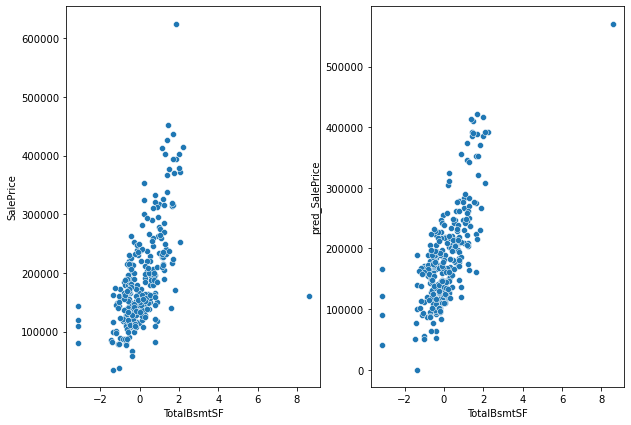

In [50]:
fig, ax = plt.subplots(1, 2, figsize = (10,7))
sns.scatterplot(data = test, x = 'TotalBsmtSF', y = 'SalePrice', ax = ax[0])
sns.scatterplot(data = test, x = 'TotalBsmtSF', y = 'pred_SalePrice', ax = ax[1]);

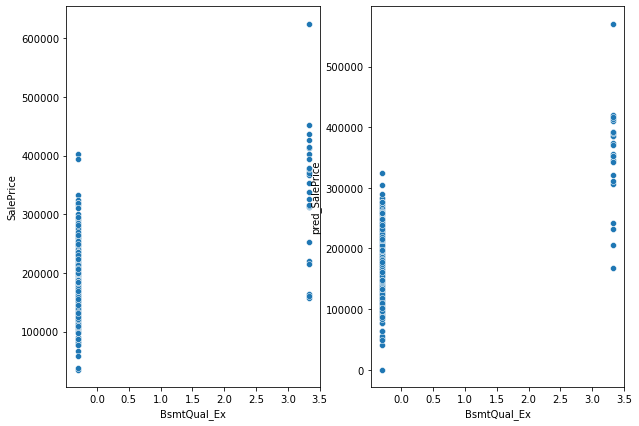

In [51]:
fig, ax = plt.subplots(1, 2, figsize = (10, 7))
sns.scatterplot(data = test, x = 'BsmtQual_Ex', y = 'SalePrice', ax = ax[0])
sns.scatterplot(data = test, x = 'BsmtQual_Ex', y = 'pred_SalePrice', ax = ax[1]);

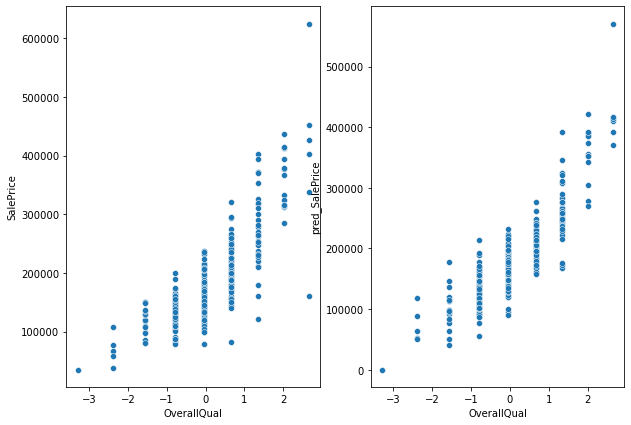

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (10, 7))
sns.scatterplot(data = test, x = 'OverallQual', y = 'SalePrice', ax = ax[0])
sns.scatterplot(data = test, x = 'OverallQual', y = 'pred_SalePrice', ax = ax[1]);



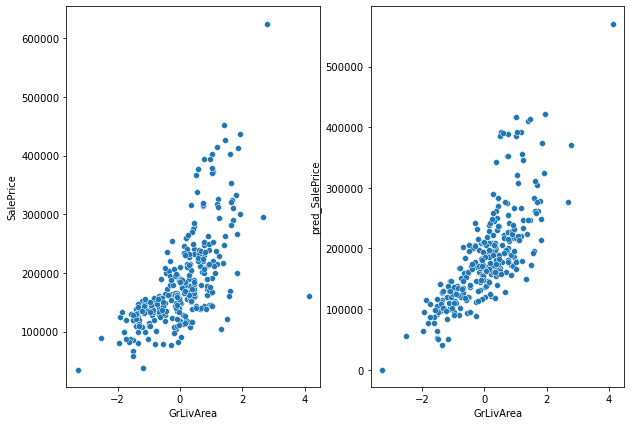

In [53]:
fig, ax = plt.subplots(1, 2, figsize = (10, 7))
sns.scatterplot(data = test, x = 'GrLivArea', y = 'SalePrice', ax = ax[0])
sns.scatterplot(data = test, x = 'GrLivArea', y = 'pred_SalePrice', ax = ax[1]);


In [61]:
## After aplying a linear regression im going to try some different models 
#and test out their acurracy to choose what fits best my solution

## Tree Visualization

In [67]:
from sklearn.tree import DecisionTreeRegressor


In [68]:
data_fit = DecisionTreeRegressor()
data_fit.fit(X_train, y_train)

DecisionTreeRegressor()

In [69]:
y_pred = data_fit.predict(X_test)
test["pred_SalePrice"]= y_pred

In [71]:
np.sqrt(mean_squared_error(test["SalePrice"], test["pred_SalePrice"]))

50801.13342424907

In [74]:
# until this point better to stick with linear regression


In [62]:
from sklearn.tree import plot_tree, export_graphviz


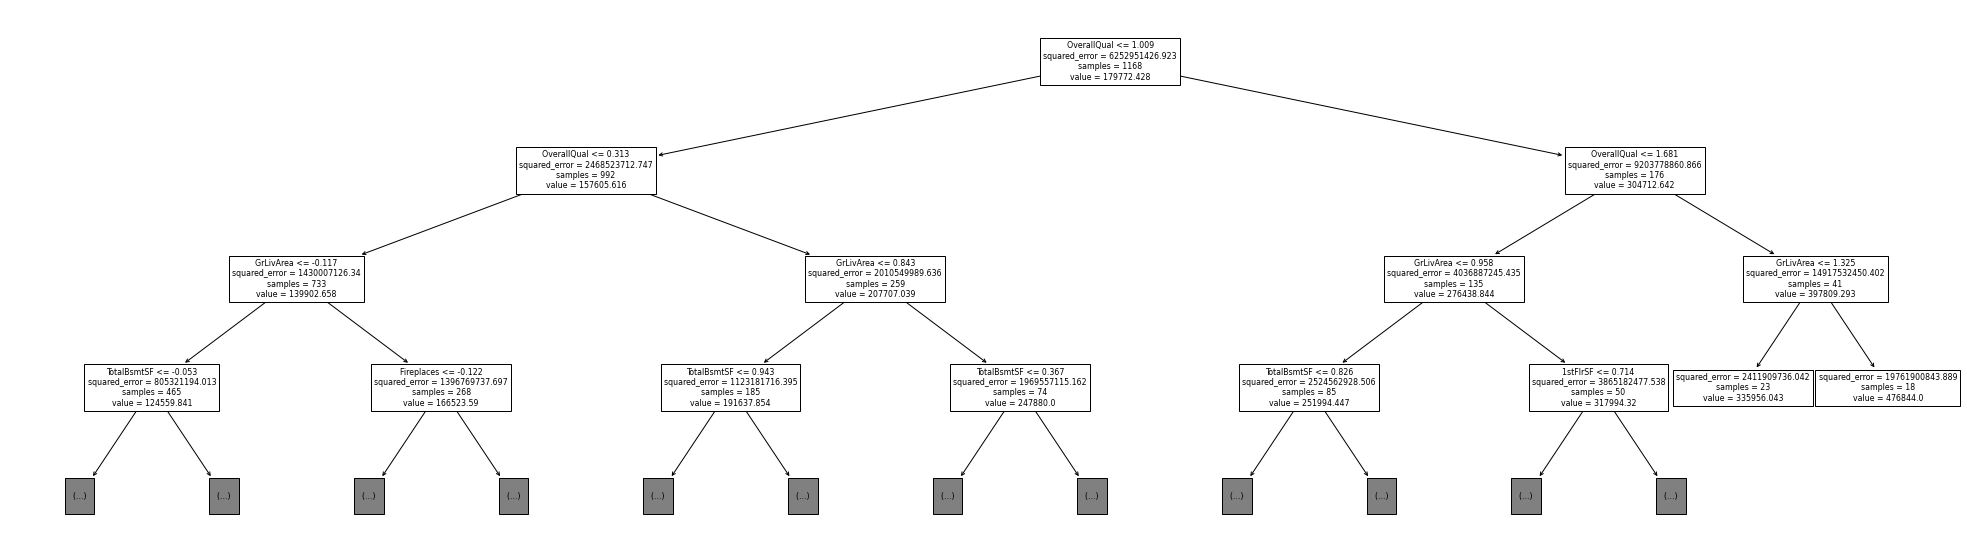

In [66]:
data_fit = DecisionTreeRegressor(max_depth= 6, min_samples_leaf = 13, min_samples_split = 28)
data_fit.fit(X_train, y_train)
plt.figure(figsize = (35, 10))
plot_tree(data_fit, feature_names=X_train.columns, max_depth = 3);

## Knn Neighbours

In [83]:
from sklearn.neighbors import KNeighborsRegressor


In [84]:
knn_fit = KNeighborsRegressor(n_neighbors=1)
knn_fit.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=1)

In [87]:
y_pred = knn_fit.predict(X_test)
test["pred_Knn_SalePrice"] = y_pred
test

,y_real,y_pred,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,BsmtQual_Ex,...,Fireplaces,ExterQual_Gd,ExterQual_Ex,BsmtFinType1_GLQ,HeatingQC_Ex,GarageFinish_Fin,Neighborhood_NridgHt,SalePrice,pred_SalePrice,pred_Knn_SalePrice
1172,171900,170813.556968,0.667499,-0.411386,0.273835,0.714225,-0.973262,-1.823096,0.797246,-0.300609,...,-1.027341,1.411313,-0.192177,-0.633365,0.985043,1.774184,-0.235958,171900,164700.0,162000.0
903,240000,237159.695366,0.667499,0.457468,1.759713,0.987113,1.349685,1.292765,0.797246,-0.300609,...,0.784005,1.411313,-0.192177,-0.633365,0.985043,-0.563640,-0.235958,240000,230000.0,175900.0
1396,160000,167822.438187,-0.783171,0.487874,0.273835,0.487744,-0.666870,1.323632,-1.025173,-0.300609,...,1.638448,-0.708560,-0.192177,-0.633365,-1.015184,-0.563640,-0.235958,160000,139600.0,130000.0
745,299800,324821.204367,1.350924,1.918516,0.273835,1.563186,0.247793,0.205859,2.480321,-0.300609,...,1.638448,-0.708560,5.203549,1.578868,0.985043,1.774184,-0.235958,299800,255900.0,266500.0
699,196000,209680.519172,0.667499,-0.090999,0.273835,0.305453,0.781000,0.731372,0.797246,-0.300609,...,-1.027341,1.411313,-0.192177,1.578868,0.985043,-0.563640,-0.235958,196000,185850.0,185000.0
894,118858,121432.066980,-0.783171,0.204481,0.273835,-0.277503,-3.131482,1.034904,0.797246,-0.300609,...,-1.027341,-0.708560,-0.192177,-0.633365,-1.015184,-0.563640,-0.235958,118858,118964.0,118964.0
1235,138887,128799.431133,-0.783171,0.655747,-1.047926,-1.361010,-0.666870,-0.667431,-1.025173,-0.300609,...,-1.027341,-0.708560,-0.192177,-0.633365,-1.015184,-0.563640,-0.235958,138887,100000.0,107000.0
1047,145000,146510.006610,-0.783171,-1.109663,0.273835,0.912049,-0.092540,-0.334848,-1.025173,-0.300609,...,-1.027341,-0.708560,-0.192177,1.578868,0.985043,-0.563640,-0.235958,145000,138000.0,147000.0
1363,156932,171275.901590,-0.042192,-0.046065,0.273835,-0.131064,-0.996452,-1.870906,0.797246,-0.300609,...,0.784005,-0.708560,-0.192177,-0.633365,0.985043,1.774184,-0.235958,156932,163990.0,181000.0
1342,228500,246468.083391,1.350924,1.242957,0.273835,0.807160,0.555200,0.482988,0.797246,-0.300609,...,0.784005,1.411313,-0.192177,-0.633365,0.985043,-0.563640,-0.235958,228500,337000.0,230500.0


In [88]:
np.sqrt(mean_squared_error(test["SalePrice"], test["pred_Knn_SalePrice"]))

47989.01060327778

In [91]:
#trying out with different neighbour values

In [94]:
knlist=[2,5,10,20]

for k in knlist:
    knn_fit = KNeighborsRegressor(n_neighbors= k)
    knn_fit.fit(X_train, y_train)
    y_pred = knn_fit.predict(X_test)
    test["pred_Knn_SalePrice"] = y_pred
    result=np.sqrt(mean_squared_error(test["SalePrice"], test["pred_Knn_SalePrice"]))
    print('No. of Neighbors: ', f'{result}')

No. of Neighbors:  43279.430325201516
No. of Neighbors:  41928.161229889265
No. of Neighbors:  40161.793009072215
No. of Neighbors:  39760.85881853933


In [95]:
#this model looks a lot better optimized with more neighbours than the linear regression

## Catboost


In [100]:
import catboost as cat


In [103]:
cat_fit = cat.CatBoost()


In [104]:
cat_fit.fit(X_train, y_train, eval_set=(X_test, y_test))


Learning rate set to 0.052178
0:	learn: 76330.1962519	test: 77825.8896600	best: 77825.8896600 (0)	total: 66.4ms	remaining: 1m 6s
1:	learn: 73927.2276963	test: 75072.6965480	best: 75072.6965480 (1)	total: 68.3ms	remaining: 34.1s
2:	learn: 71484.5398491	test: 72403.2479048	best: 72403.2479048 (2)	total: 70ms	remaining: 23.3s
3:	learn: 69176.0584960	test: 69903.3342436	best: 69903.3342436 (3)	total: 71.7ms	remaining: 17.9s
4:	learn: 66997.0989455	test: 67432.7888923	best: 67432.7888923 (4)	total: 73.6ms	remaining: 14.6s
5:	learn: 64908.6392408	test: 65082.8781996	best: 65082.8781996 (5)	total: 75.6ms	remaining: 12.5s
6:	learn: 62996.4117987	test: 62942.8636826	best: 62942.8636826 (6)	total: 77.9ms	remaining: 11s
7:	learn: 61197.9643769	test: 60851.2611381	best: 60851.2611381 (7)	total: 79.5ms	remaining: 9.86s
8:	learn: 59429.3889240	test: 58668.2362176	best: 58668.2362176 (8)	total: 81.4ms	remaining: 8.96s
9:	learn: 57741.4913838	test: 56974.5740909	best: 56974.5740909 (9)	total: 83.3ms	r

In [106]:
y_pred = cat_fit.predict(X_test)
test["cat_SalePrice_pref"] = y_pred

np.sqrt(mean_squared_error(test["SalePrice"], test["cat_SalePrice_pref"]))

29152.55199842881

In [107]:
#way better!

## Testing the Linear Regression Model with the a Logaritmic Y

In [109]:
X= final_data_.loc[:,  final_data_.columns !='SalePrice']
y= np.log(final_data_['SalePrice'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20)
lin = LinearRegression()
lin.fit(X_train,y_train)

LinearRegression()

In [110]:
y_pred= lin.predict(X_test)
test = pd.DataFrame({"y_real": y_test, "y_pred": y_pred})
test = pd.concat([test, X_test], axis=1)

In [112]:

test["SalePrice"] = np.exp(test["y_real"])
test["pred_SalePrice"] = np.exp(test["y_pred"])
np.sqrt(mean_squared_error(test["SalePrice"], test["pred_SalePrice"]))

34971.37448879038

In [113]:
# better, but not as good as the other model types